EDA ON PREPROCESSED DATA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

In [3]:
def plot_news_eda(news_df, company_name):
    print(f"\n=== News EDA for {company_name} ===")

    if "published_at" in news_df.columns:
        news_df["published_at"] = pd.to_datetime(news_df["published_at"], errors="coerce")
        news_df = news_df.dropna(subset=["published_at"])
    else:
        raise ValueError("Column 'published_at' not found in news_df")

    if "source" in news_df.columns:
        plt.figure(figsize=(10,5))
        news_df['source'].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Top 10 News Sources ({company_name})", fontsize=16, weight='bold')
        plt.xlabel("Source")
        plt.ylabel("Number of Articles")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if "category" in news_df.columns:
        plt.figure(figsize=(6,4))
        news_df['category'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title(f"News Category Distribution ({company_name})", fontsize=16, weight='bold')
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(12,5))
    articles_per_period = news_df.groupby(pd.Grouper(key="published_at", freq="15D")).size()
    plt.bar(articles_per_period.index.astype(str), articles_per_period.values,
            color="steelblue", edgecolor="black")
    plt.title(f"Number of News Articles (15-day intervals) - {company_name}", fontsize=16, weight='bold')
    plt.xlabel("15-day Period")
    plt.ylabel("Article Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    if "title" in news_df.columns:
        text = " ".join(news_df['title'].dropna().tolist())
        if text.strip():
            wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
            plt.figure(figsize=(12,6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Word Cloud of News Titles ({company_name})", fontsize=16, weight='bold')
            plt.show()
def plot_stock_eda(stock_df, company_name):
    print(f"\n=== Stock EDA for {company_name} ===")

    if "Date" in stock_df.columns:
        stock_df["Date"] = pd.to_datetime(stock_df["Date"], errors="coerce")
        stock_df = stock_df.dropna(subset=["Date"])
    else:
        raise ValueError("Column 'Date' not found in stock_df")

    plt.figure(figsize=(12,6))
    plt.plot(stock_df['Date'], stock_df['Close'], color="navy", linewidth=2)
    plt.title(f"{company_name} Stock Closing Price Over Time", fontsize=16, weight='bold')
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(stock_df['Date'], stock_df['Volume'], color="purple", linewidth=2)
    plt.title(f"{company_name} Trading Volume Over Time", fontsize=16, weight='bold')
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.tight_layout()
    plt.show()

    stock_df['Daily Return'] = stock_df['Close'].pct_change()
    plt.figure(figsize=(8,5))
    sns.histplot(stock_df['Daily Return'].dropna(), bins=20, kde=True, color="teal", edgecolor="black")
    plt.title(f"Distribution of Daily Returns - {company_name}", fontsize=16, weight='bold')
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
def plot_stock_news_relation(stock_df, news_df, company_name):
    print(f"\n=== Stock + News Relation for {company_name} ===")

    stock_df["Date"] = pd.to_datetime(stock_df["Date"]).dt.date
    news_df["published_at"] = pd.to_datetime(news_df["published_at"]).dt.date

    articles_per_day = news_df.groupby("published_at").size()

    min_date = max(min(stock_df["Date"]), min(articles_per_day.index))
    max_date = min(max(stock_df["Date"]), max(articles_per_day.index))
    stock_mask = (stock_df["Date"] >= min_date) & (stock_df["Date"] <= max_date)
    stock_df = stock_df.loc[stock_mask]

    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(stock_df["Date"], stock_df["Volume"], color="navy", linewidth=2, label="Volume")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Volume", color="navy")
    ax1.tick_params(axis="y", labelcolor="navy")

    ax2 = ax1.twinx()
    ax2.plot(articles_per_day.index, articles_per_day.values, color="darkorange", linewidth=2, label="News Articles")
    ax2.set_ylabel("Number of News Articles", color="darkorange")
    ax2.tick_params(axis="y", labelcolor="darkorange")

    plt.title(f"Stock Volume vs News Volume ({company_name})", fontsize=16, weight="bold")
    fig.tight_layout()
    plt.show()


=== News EDA for Infosys ===


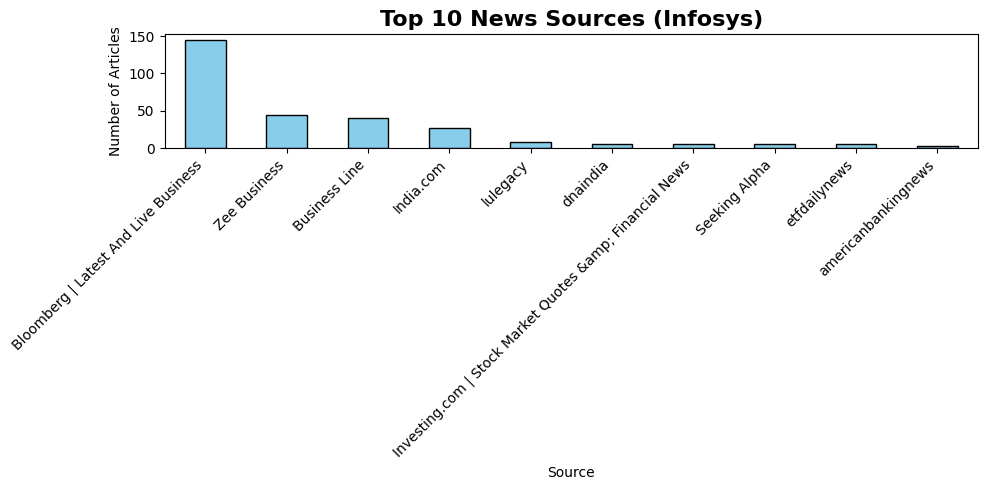

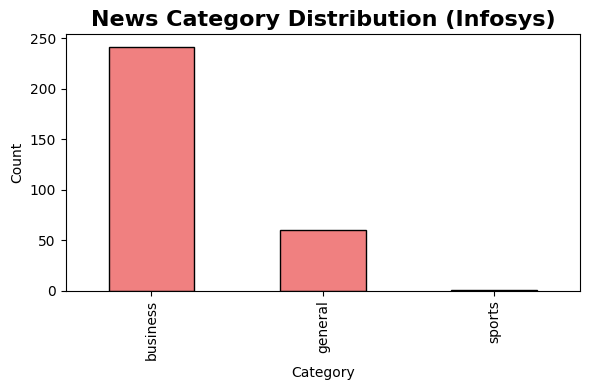

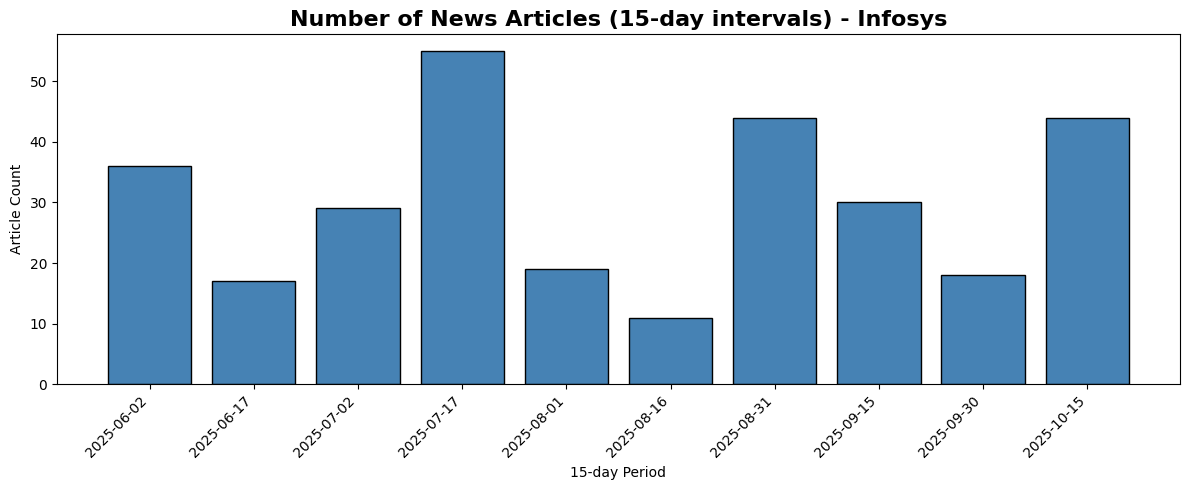

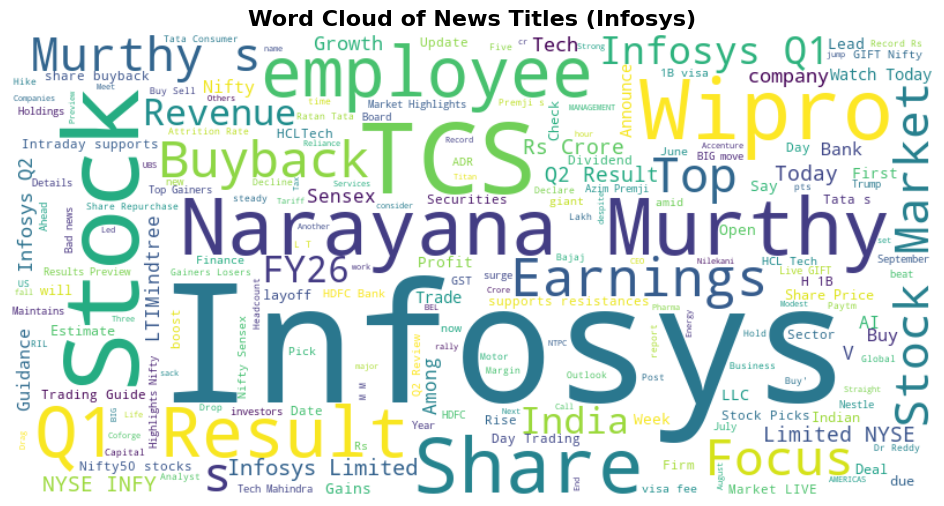


=== Stock EDA for Infosys ===


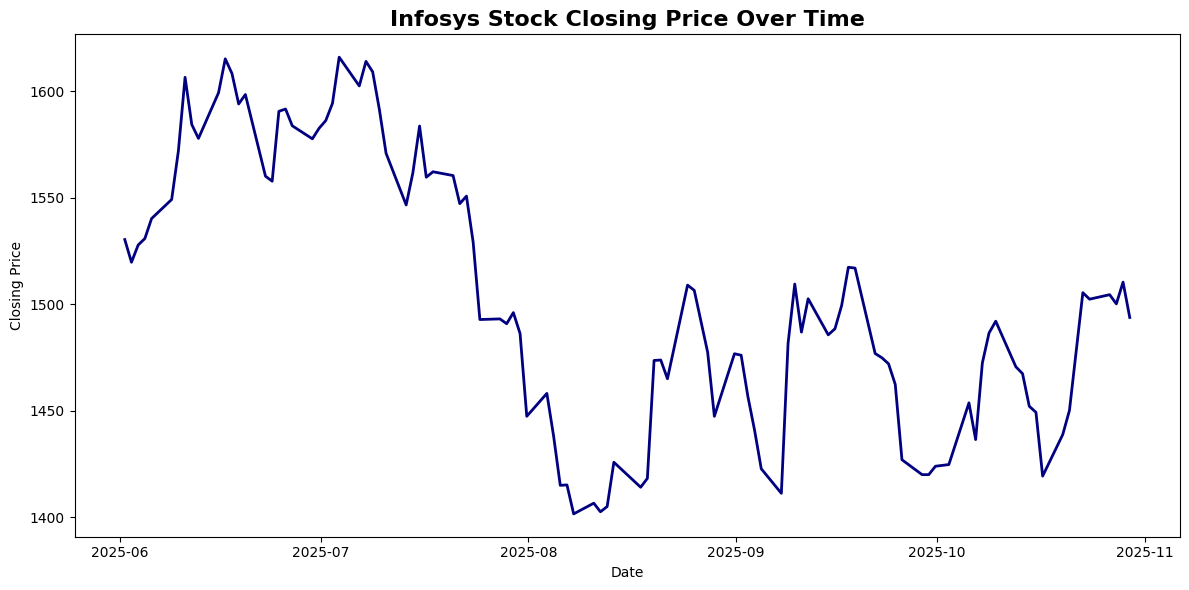

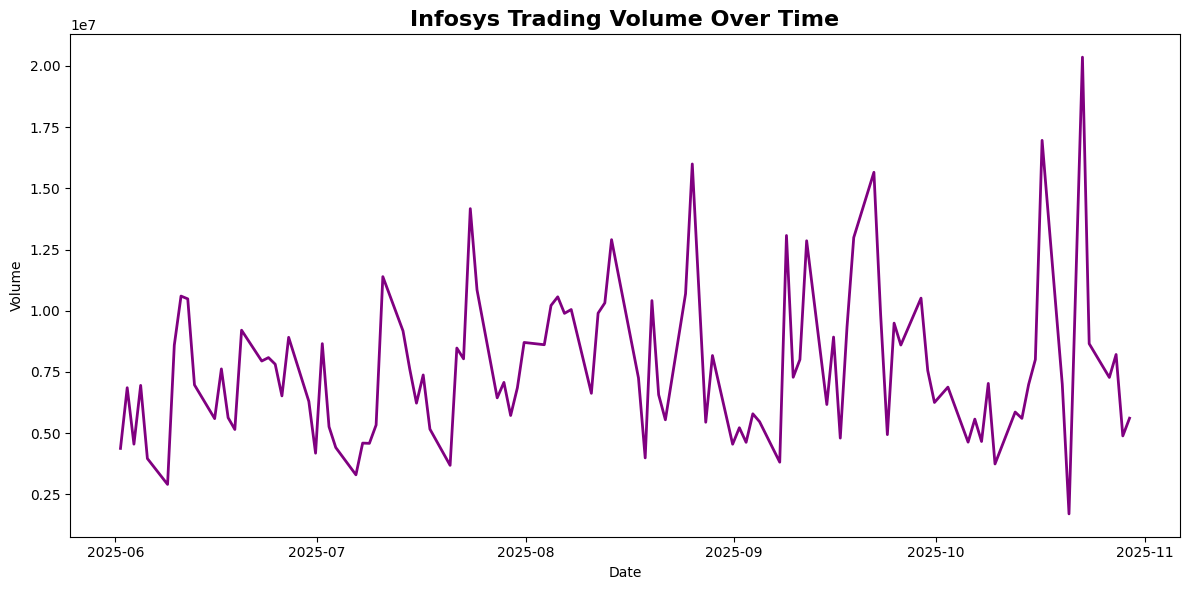

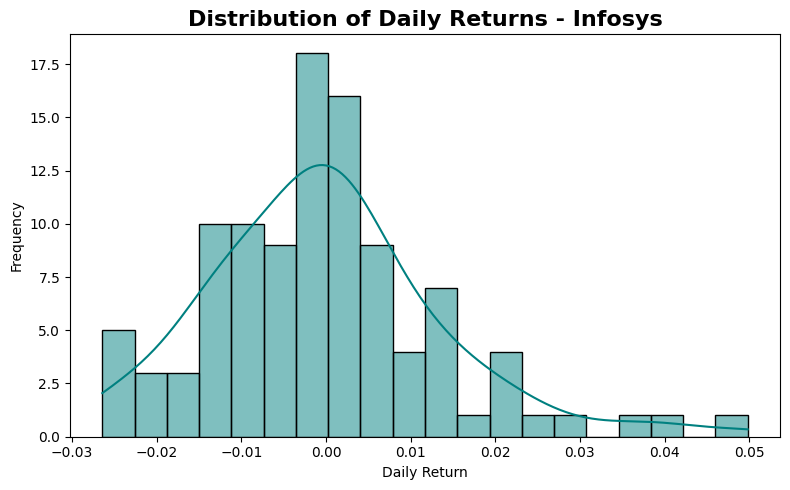


=== Stock + News Relation for Infosysis ===


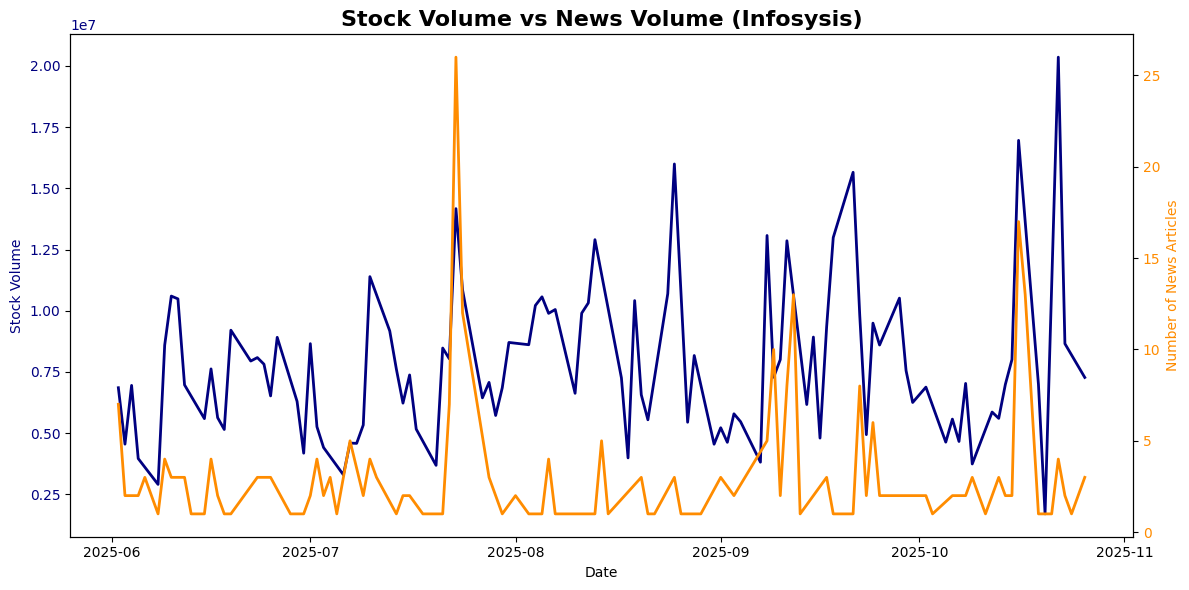

In [7]:
inf_stock_df = pd.read_csv("D:/5TH SEM/stock_sentiment_project/data/preprocessed/stock/clean_infosys_stock.csv")
inf_news_df = pd.read_json("D:/5TH SEM/stock_sentiment_project/data/preprocessed/news/clean_infosys.json")
plot_news_eda(inf_news_df, "Infosys")
plot_stock_eda(inf_stock_df, "Infosys")
plot_stock_news_relation(inf_stock_df, inf_news_df, "Infosysis")


=== News EDA for SBI ===


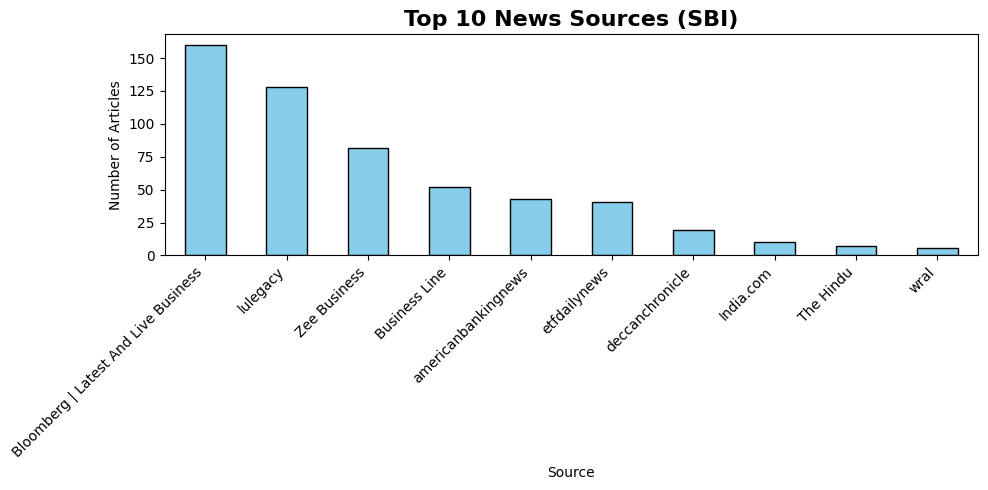

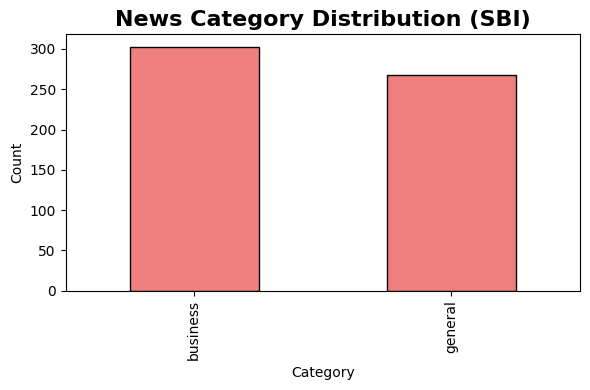

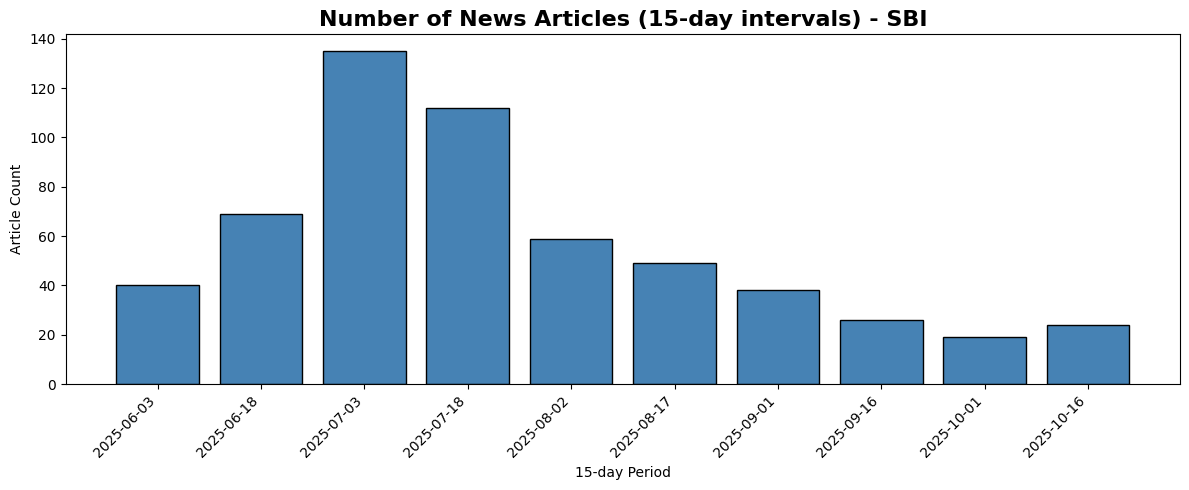

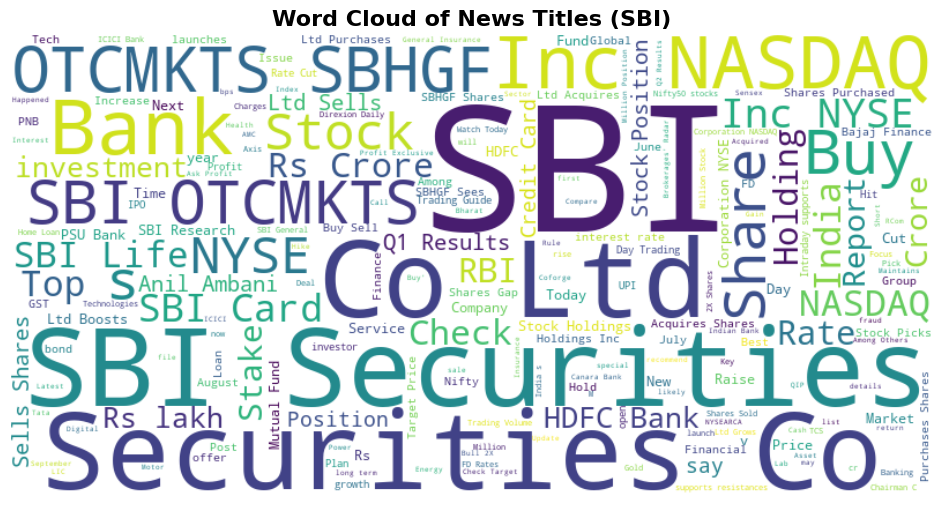


=== Stock EDA for SBI ===


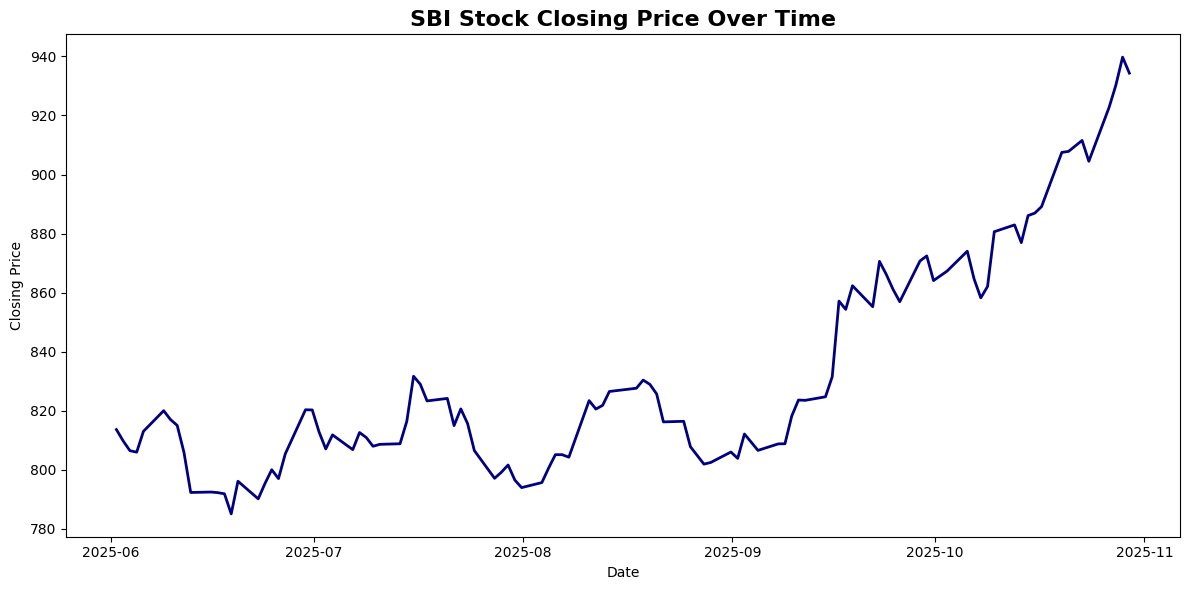

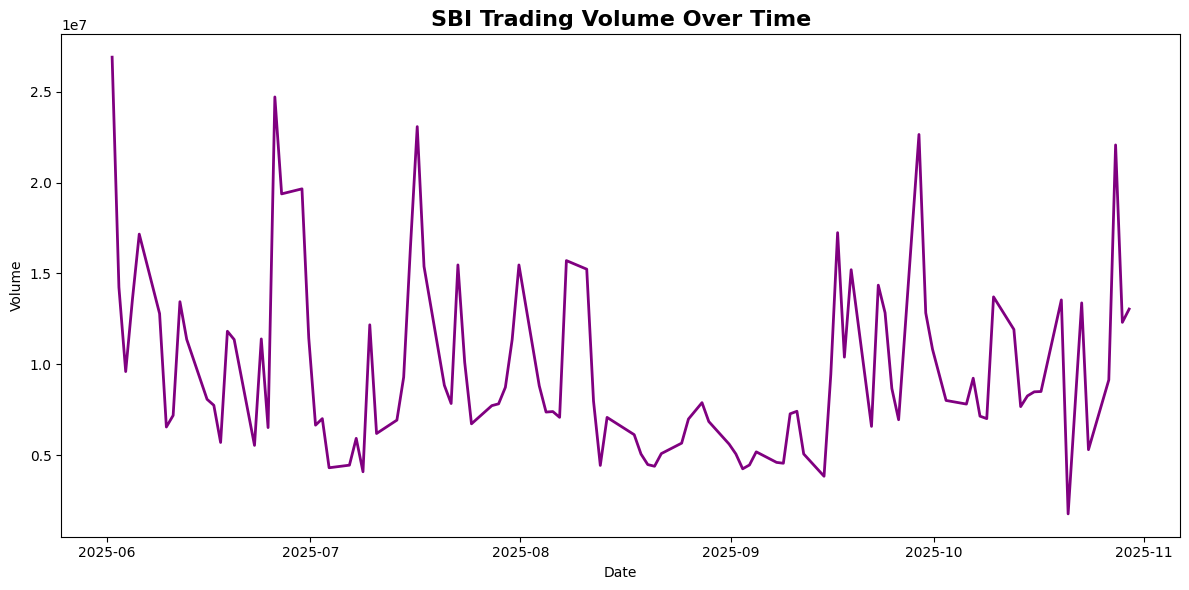

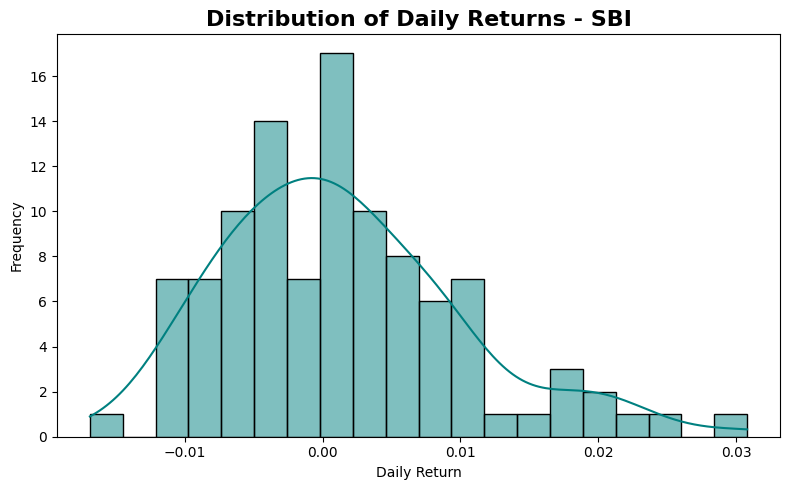


=== Stock + News Relation for SBIis ===


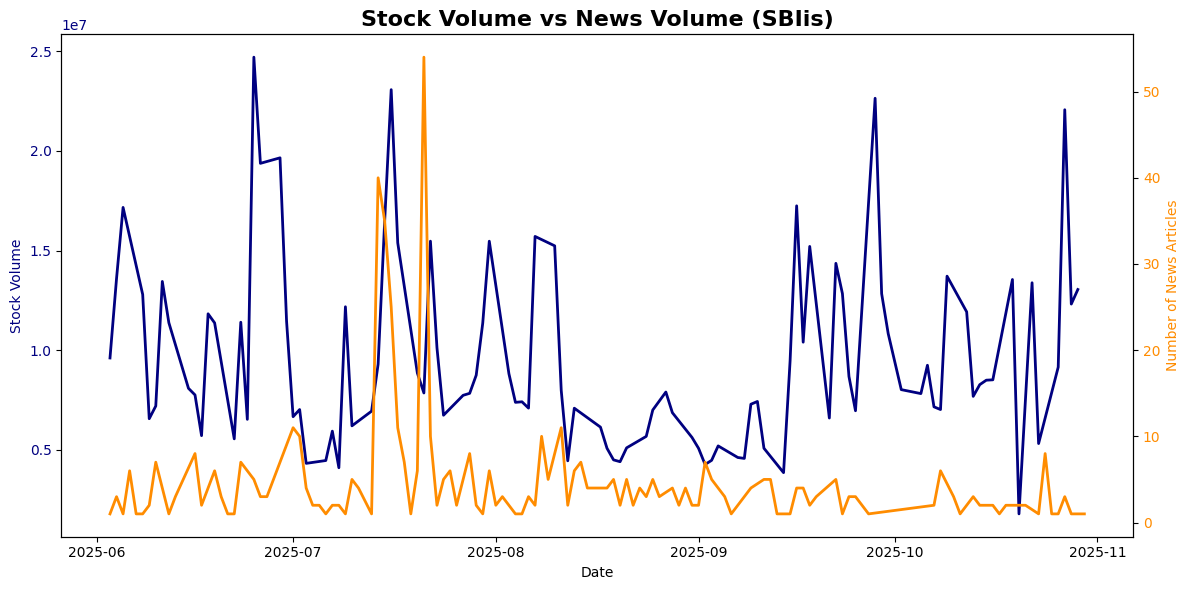

In [8]:
sbi_stock_df = pd.read_csv("D:/5TH SEM/stock_sentiment_project/data/preprocessed/stock/clean_sbi_stock.csv")
sbi_news_df = pd.read_json("D:/5TH SEM/stock_sentiment_project/data/preprocessed/news/clean_sbi.json")
plot_news_eda(sbi_news_df, "SBI")
plot_stock_eda(sbi_stock_df, "SBI")
plot_stock_news_relation(sbi_stock_df, sbi_news_df, "SBIis")


=== News EDA for Reliance ===


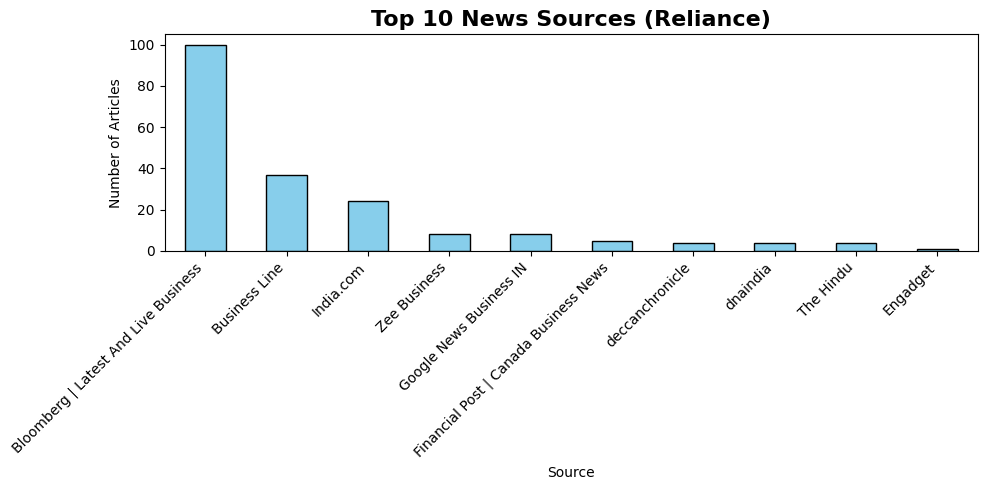

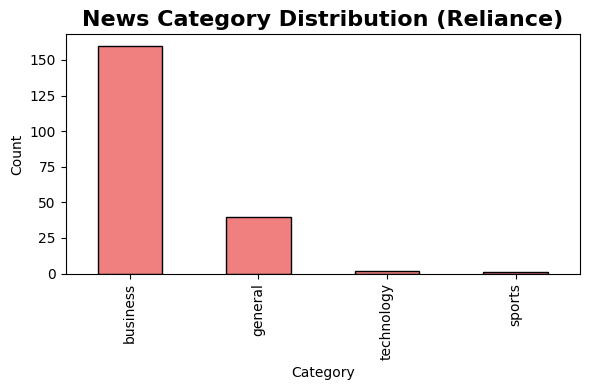

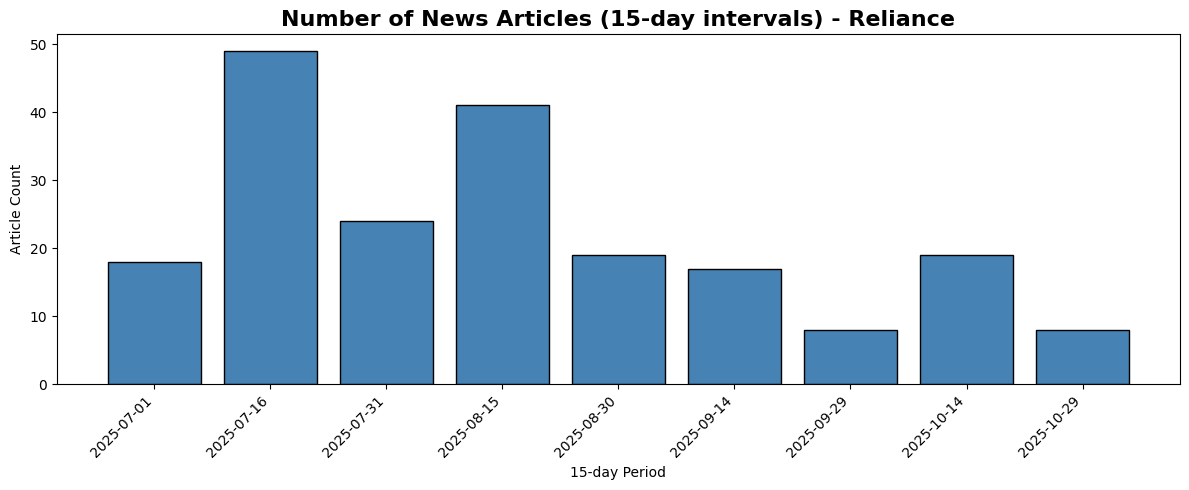

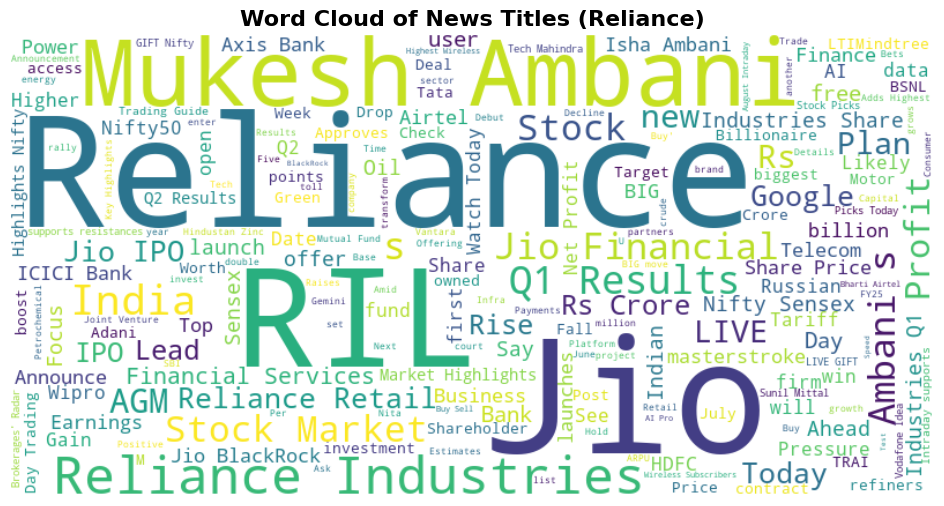


=== Stock EDA for Reliance ===


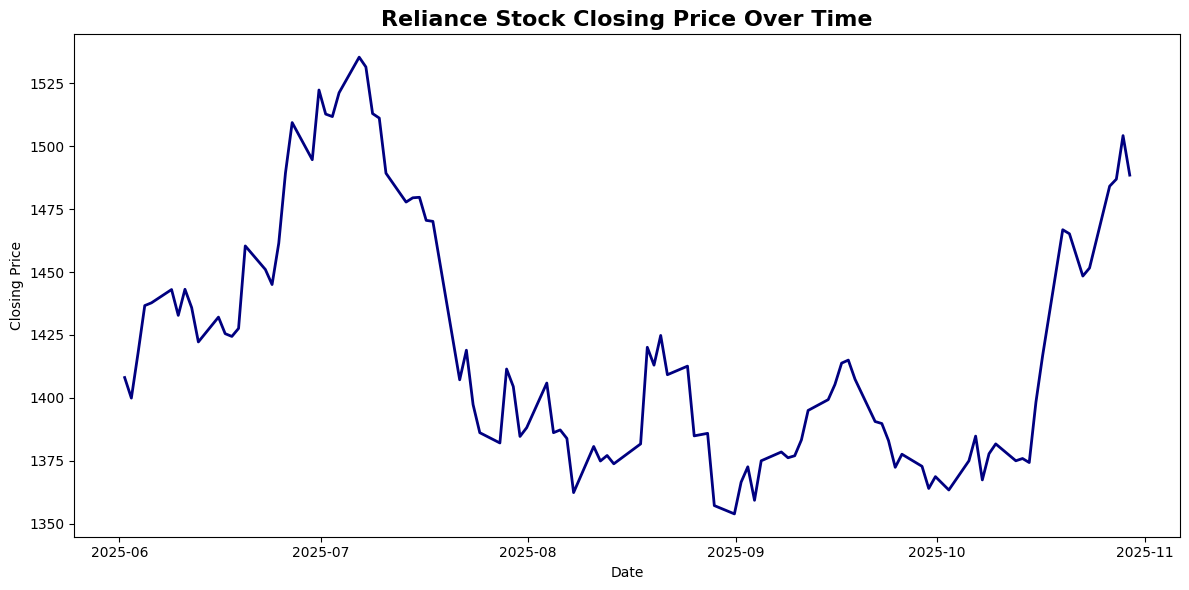

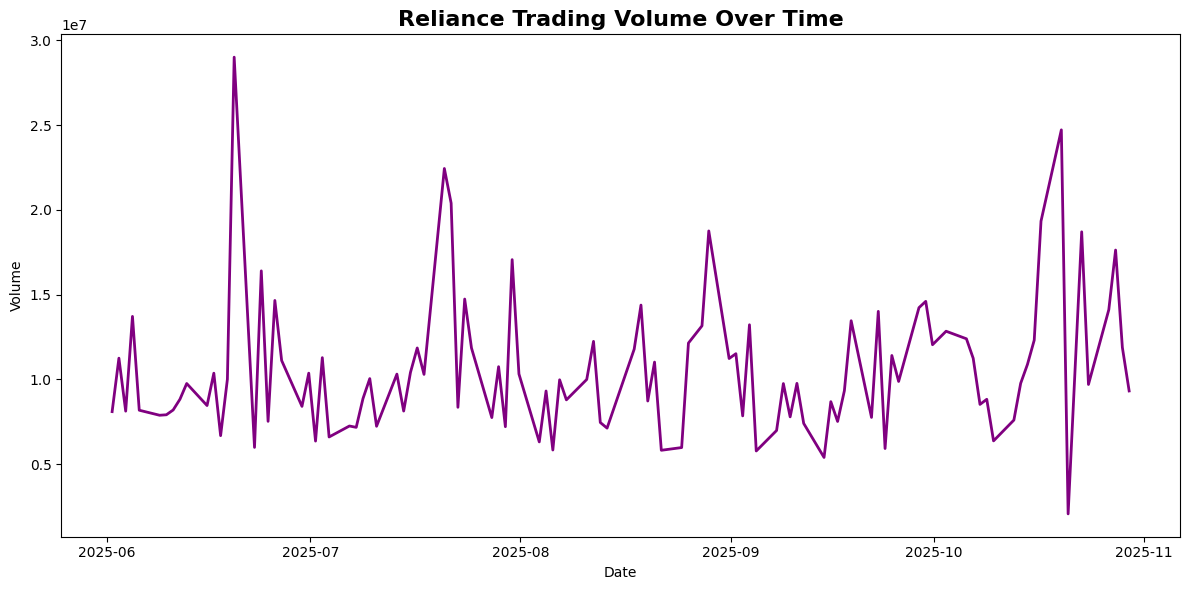

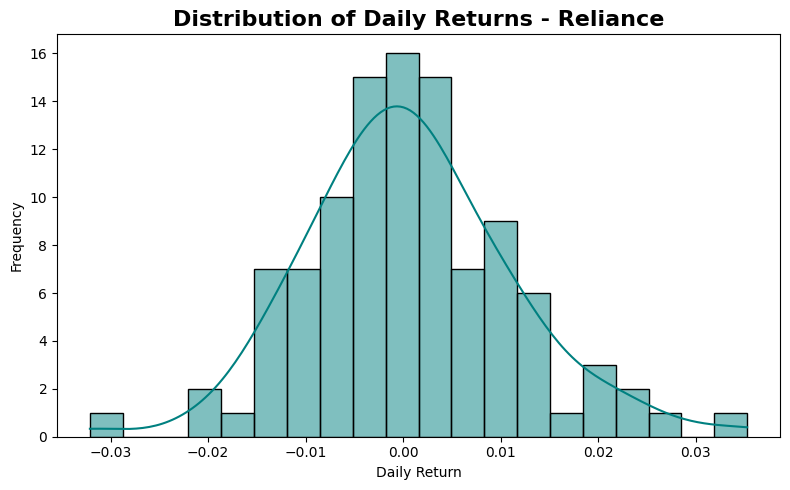


=== Stock + News Relation for Relianceis ===


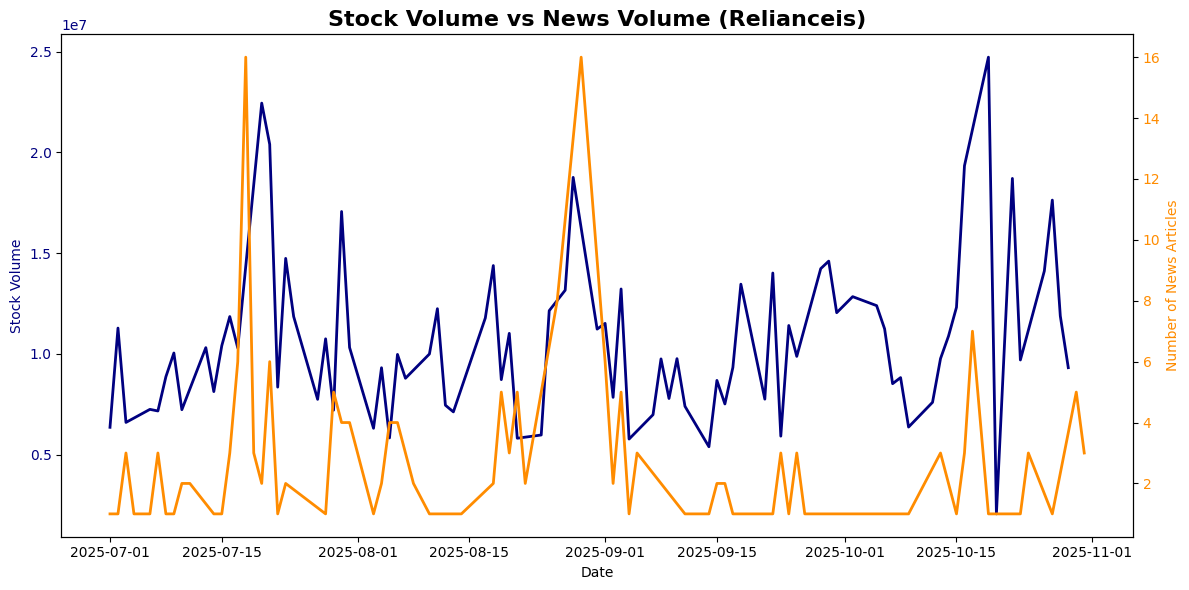

In [9]:
rel_stock_df = pd.read_csv("D:/5TH SEM/stock_sentiment_project/data/preprocessed/stock/clean_reliance_stock.csv")
rel_news_df = pd.read_json("D:/5TH SEM/stock_sentiment_project/data/preprocessed/news/clean_reliance.json")
plot_news_eda(rel_news_df, "Reliance")
plot_stock_eda(rel_stock_df, "Reliance")
plot_stock_news_relation(rel_stock_df, rel_news_df, "Relianceis")